# Example of a high-order approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from sympy import * 

In [47]:
# parameters
c       = 3  # velocity
K       = 1    # diffusion constant
nx      = 100  # grid points 
x0      = 0    # left boundary
x1      = 1    # right boundary

# make the mesh and the grid spacing
X       = np.linspace(x0,x1, nx)

In [48]:
# analytical solution
C2      = 1/(1-np.exp(c/K))
C1      = -C2
u_ex    = C1*np.exp(c/K*X) + C2

In [49]:
# hide
# collocation method
a0,a1,a2,a3,x      = symbols('a0 a1 a2 a3 x')
x1      = 1/3 #collocation point
x2      = 2/3 #collocation point

R1      = a0
R2      = c*(a1 + 2*a2*x1 + 3*a3*x1**2) - K*(2*a2+6*a3*x1)
R3      = c*(a1 + 2*a2*x2 + 3*a3*x2**2) - K*(2*a2+6*a3*x2)
R4      = a1 + a2 + a3 - 1

sol = linsolve([R1,R2,R3,R4], (a0,a1,a2,a3))

a0      = float(list(sol)[0][0].n()) # convert result to float
a1      = float(list(sol)[0][1].n()) # convert result to float
a2      = float(list(sol)[0][2].n()) # convert result to float
a3      = float(list(sol)[0][3].n()) # convert result to float

u_c2 = a0 + a1*X + a2*np.square(X) + a3*np.power(X, 3)

#compute the RMS error
E_rms_c2 = sqrt(np.sum(np.square(u_ex - u_c2))/nx)
E_x_c2   = np.sqrt(np.square(u_ex - u_c2)/nx)

In [ ]:
# collocation method
#a0,a1,a2,a3,x      = symbols('a0 a1 a2 a3 x')
#x1      = 1/3 #collocation point
#x2      = 2/3 #collocation point

#R1      = ???
#R2      = ???
#R3      = ???
#R4      = ???

#sol = linsolve([?,?,?,?], (a0,a1,a2,a3))

#a0      = float(list(sol)[0][0].n()) # convert result to float
#a1      = float(list(sol)[0][1].n()) # convert result to float
#a2      = float(list(sol)[0][2].n()) # convert result to float
#a3      = float(list(sol)[0][3].n()) # convert result to float

#u_c2 = a0 + a1*X + a2*np.square(X) + a3*np.power(X, 3)

#compute the RMS error
#E_rms_c2 = sqrt(np.sum(np.square(u_ex - u_c2))/nx)
#E_x_c2   = np.sqrt(np.square(u_ex - u_c2)/nx)

Text(0, 0.5, 'RMS Error')

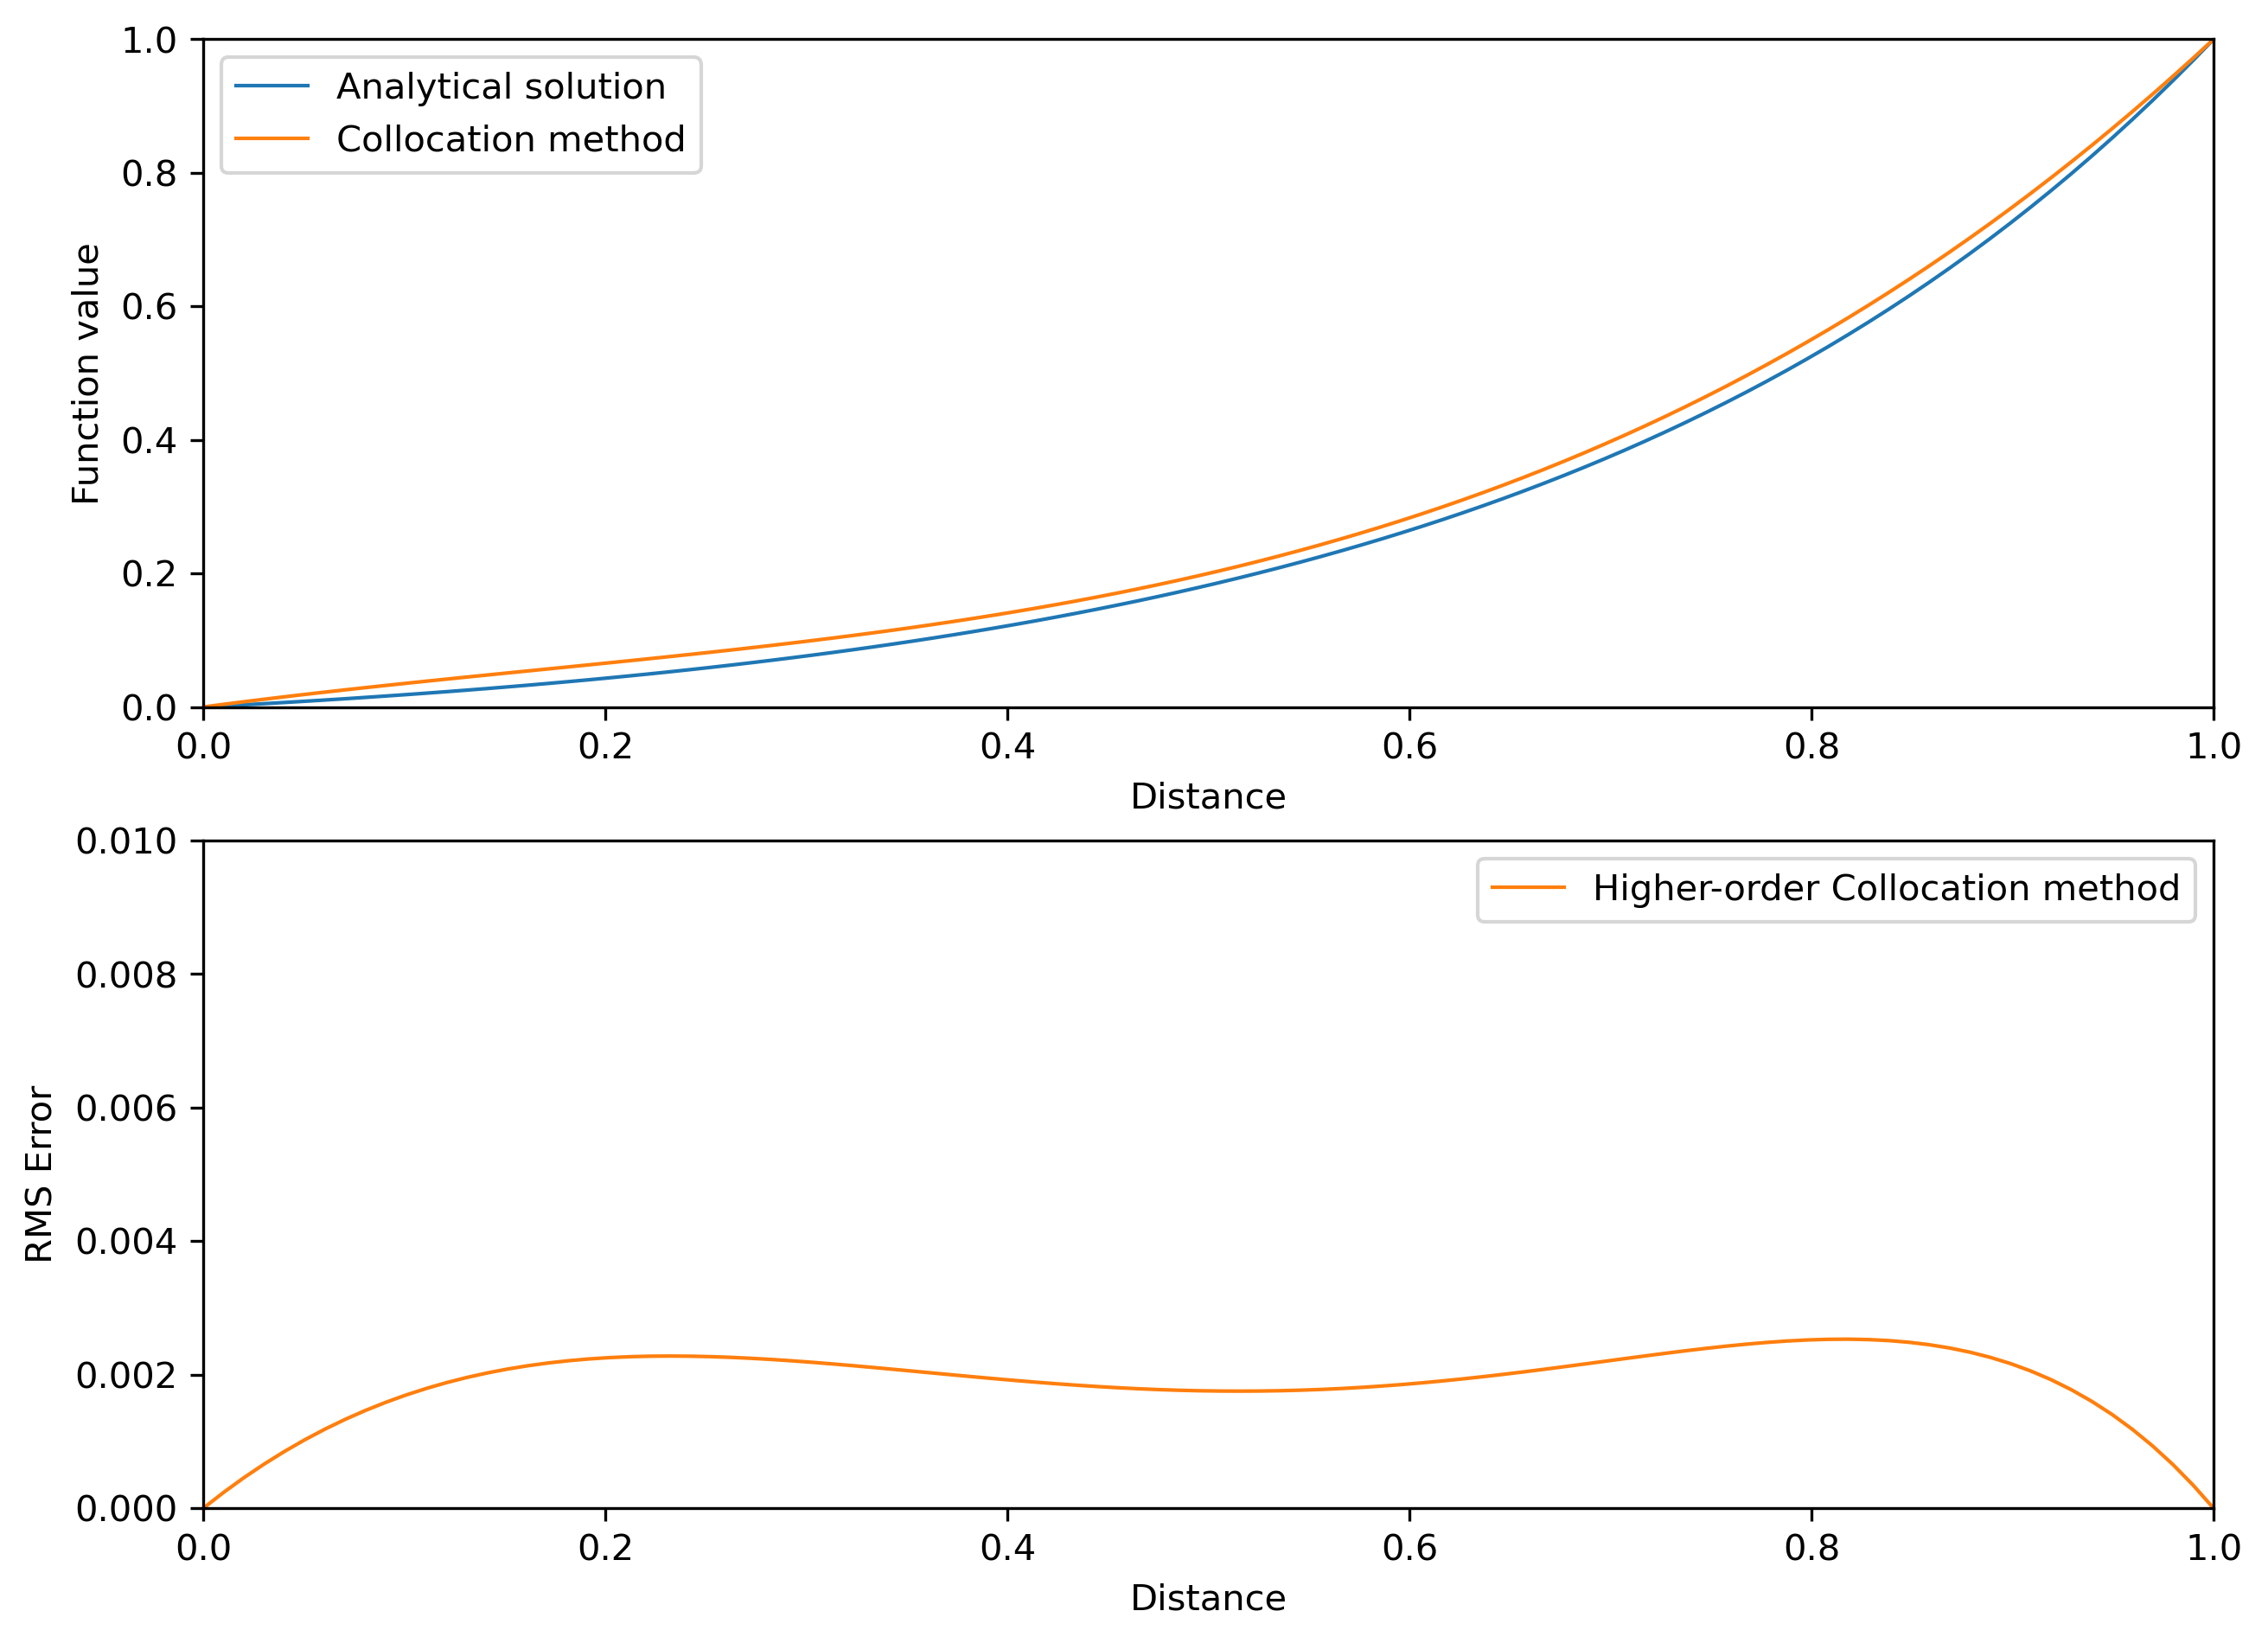

In [50]:
# plotting 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7.5))

# prepare axis
# function value 
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.plot(X, u_ex, lw=1,  label='Analytical solution')
ax1.plot(X, u_c2, lw=1,  label='Collocation method')

ax1.legend()

ax1.set_xlabel('Distance')
ax1.set_ylabel('Function value')

# error estimate
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.01)
ax2.plot([],[],lw=1)
ax2.plot(X, E_x_c2, lw=1, label='Higher-order Collocation method')


ax2.legend()

ax2.set_xlabel('Distance')
ax2.set_ylabel('RMS Error')